In [1]:
from micromort.data_stores.mysql import db, cursor
from micromort.data_stores.mongodb import getConnection
from multiprocessing.dummy import Pool as ThreadPool
import json
from micromort.scrapers.newspaper_scraper import Newspaper_scraper
import traceback
import numpy as np

### Get tweets with lcoation:

In [2]:
cursor.execute('Select tweet_id, state, country from newsTweets_location where tweet_id > 1000232612659687424')
location_tweet_data = cursor.fetchall()

In [3]:
len(location_tweet_data)

1737081

### Fetch Urls from the tweets

In [4]:
mongo_db_name = "micromort"
mongo_collection_name = "newstweets"
mongoClient = getConnection(mongo_db_name, mongo_collection_name)
scraper = Newspaper_scraper(classify=False)

In [5]:
def getmongoData(tweet_id):
    return list(mongoClient.find({"id": tweet_id}))

def gen_dict_extract(key, var):
    if hasattr(var, 'items'):
        for k, v in var.items():
            if k == key:
                yield v
            if isinstance(v, dict):
                for result in gen_dict_extract(key, v):
                    yield result
            elif isinstance(v, list):
                for d in v:
                    for result in gen_dict_extract(key, d):
                        yield result

def getUrl(tweet):
    return gen_dict_extract("expanded_url", tweet)

In [6]:
counter=0
unique_urls ={}
def myFun(row):
    try:
        global counter
        global unique_urls
        counter=counter+1
        if counter%2000 == 0:
            print counter
        tweet_id = row[0]
        tweet = getmongoData(tweet_id)
        urls = getUrl(tweet[0])
        filtered_urls = {}
        for url in urls:
            url = url[:1000]
            if "twitter.com" not in url:
                filtered_urls[url] = 1
                unique_urls[url] = {}
        if not len(filtered_urls.keys()):
            return 1
        return {
            "urls" : filtered_urls.keys(),
            "tweet_id" : tweet_id,
            "state" : row[1],
            "country" : row[2]
        }
    except Exception as e:
        print e
        return -1
        
pool = ThreadPool(3)
location_url_tweets = pool.map(myFun, location_tweet_data)

2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000
90000
92000
94000
96000
98000
100000
102000
104000
106000
108000
110000
112000
114000
116000
118000
120000
122000
124000
126000
128000
130000
132000
134000
136000
138000
140000
142000
144000
146000
148000
150000
152000
154000
156000
158000
160000
162000
164000
166000
168000
170000
172000
174000
176000
178000
180000
182000
184000
186000
188000
190000
192000
194000
196000
198000
200000
202000
204000
206000
208000
210000
212000
214000
216000
218000
220000
222000
224000
226000
228000
230000
232000
234000
236000
238000
240000
242000
244000
246000
248000
250000
252000
254000
256000
258000
260000
262000
264000
266000
268000
270000
272000
274000
276000
278000
280000
282000
284000
286000
288000
290000
292000
294000
296000
298000
300000
302

In [7]:
len(location_url_tweets), location_url_tweets[:10]

(1737081,
 [{'country': 'United States',
   'state': 'Wisconsin',
   'tweet_id': 1000232615012683776L,
   'urls': [u'https://mobile.nytimes.com/2018/04/26/us/politics/migrant-children-missing.amp.html']},
  {'country': 'India',
   'state': '',
   'tweet_id': 1000232615553785856L,
   'urls': [u'http://www.abplive.in/india-news/un-experts-call-to-protect-journo-rana-ayyub-urgently-702897']},
  {'country': 'India',
   'state': '',
   'tweet_id': 1000232616371437568L,
   'urls': [u'http://ndtv.com/live']},
  {'country': 'India',
   'state': 'Andhra Pradesh',
   'tweet_id': 1000232617625571329L,
   'urls': [u'http://indianexpress.com/article/trending/trending-in-india/shilpa-shetty-kundra-sons-birthday-instagram-troll-5190692/']},
  {'country': 'United States',
   'state': 'Oregon',
   'tweet_id': 1000232618732875776L,
   'urls': [u'https://www.yahoo.com/news/trumps-son-concerned-wiretaps-show-trump-jr-met-putin-ally-231215529.html']},
  {'country': 'United States',
   'state': 'North Carol

### Scrape the data

In [9]:
#Number of unique urls:
len(unique_urls.keys())

179746

In [ ]:
counter=0
def myFun(url):
    try:
        global counter
        counter=counter+1
        if counter%1000 == 0:
            print counter
        global unique_urls
        unique_urls[url] = scraper.scrape(url)
    except Exception as e:
        print e
    return 1

pool = ThreadPool(6)
a = pool.map(myFun, unique_urls.keys())

/usr/local/lib/python2.7/dist-packages/dateutil/parser/_parser.py:1165: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this raise an exception.
  category=UnknownTimezoneWarning)
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi"

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

1000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/

2000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

3000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

4000


CRITICAL:newspaper.article:jpeg error with PIL, timed out
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (s

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

5000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

6000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

7000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

8000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 603, in document_fromstring
    "Document is empty")
ParserError: Document is empty
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most rece

9000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

10000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

11000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

12000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, timed out
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, ('The read operation timed out',)
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(htm

13000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

14000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, timed out
CRITICAL:newspaper.article:jpeg error with PIL, timed out
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "pa

15000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


16000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

17000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

18000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, timed out
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site

19000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

20000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in 

21000


CRITICAL:newspaper.article:jpeg error with PIL, timed out
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lx

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

22000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", li

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

23000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, timed out
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src

24000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

25000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

CRITICAL:newspaper.article:jpeg error with PIL, timed out
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lx

26000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, timed out
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lx

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

27000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

28000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

29000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


30000


CRITICAL:newspaper.article:jpeg error with PIL, timed out
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (s

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

31000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

32000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

33000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in 

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

34000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

35000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

36000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

37000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

38000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

39000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


40000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

41000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, timed out
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


42000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

43000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

  File "parser.pxi", line 582, in lxml.etree._ParserContext._handleParseResultDoc (src/lxml/lxml.etree.c:91290)
  File "parser.pxi", line 683, in lxml.etree._handleParseResult (src/lxml/lxml.etree.c:92476)
  File "parser.pxi", line 631, in lxml.etree._raiseParseError (src/lxml/lxml.etree.c:91904)
XMLSyntaxError: line 686: htmlParseEntityRef: no name
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(ht

44000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

45000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

/usr/local/lib/python2.7/dist-packages/dateutil/parser/_parser.py:1165: UnknownTimezoneWarning: tzname CDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this raise an exception.
  category=UnknownTimezoneWarning)
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.e

46000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


47000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, timed out
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (s

48000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in 

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

49000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

50000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


51000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
ERROR:urllib3.connection:Certificate did not match expected hostname: www.howtorootandroiddevice.com. Certificate: {'subjectAltName': [('DNS', '*.ipage.com'), ('DNS', 'ipage.com')], 'subject': ((('commonName', u'*.ipage.com'),),)}
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


52000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, timed out
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, pa

53000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

54000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

55000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

56000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

57000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", li

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

58000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 582, in lxml.etree._ParserContext._handleParseResultDoc (src/lxml/

59000


/usr/local/lib/python2.7/dist-packages/dateutil/parser/_parser.py:1165: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this raise an exception.
  category=UnknownTimezoneWarning)
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi"

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


60000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

61000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

62000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

63000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

64000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

65000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

66000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

67000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

68000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

69000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

70000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/outputformatters.py", line 68, in convert_to_text
    txt = self.parser.getText(node)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 196, in getText
    txts = [i for i in node.itertext()]
  File "lxml.etree.pyx", line 1437, in lxml.etree._Element.itertext (src/lxml/lxml.etree.c:49689)
  File "lxml.etree.pyx", line 2793, in lxml.etree.ElementTextIterator.__cinit__ (src/lxml/lxml.etree.c:65591)
  File "iterparse.pxi", line 247, in lxml.etree.iterwalk.__init__ (src/lxml/lxml.etree.c:126609)
  File "apihelpers.pxi", line 72, in lxml.etree._rootNodeOrRaise (src/lxml/lxml.etree.c:14353)
ValueError: Input object has no element: HtmlProcessingInstruction
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatena

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

71000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

72000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

73000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


74000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

75000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", li

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

76000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

77000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

78000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

79000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/

80000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


81000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

82000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/c

83000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

84000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", li

CRITICAL:newspaper.article:jpeg error with PIL, timed out
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (sr

85000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

86000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

87000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
ERROR:urllib3.connection:Certificate did not match expected hostname: www.howtorootandroiddevice.com. Certificate: {'subjectAltName': [('DNS', '*.ipage.com'), ('DNS', 'ipage.com')], 'subject': ((('commonName', u'*.ipage.com'),),)}
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


88000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

89000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

90000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

91000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

92000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

93000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

94000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in 

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

95000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, timed out
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.

96000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
ERROR:urllib3.connection:Certificate did not match expected hostname: www.cricketgraph.blogspot.com. Certificate: {'subjectAltName': [('DNS', '*.googleusercontent.com'), ('DNS', '*.apps.googleusercontent.com'), ('DNS', '*.appspot.com.storage.googleapis.com'), ('DNS', '*.blogspot.com'), ('DNS', '*.bp.blogspot.com'), ('DNS', '*.commondatastorage.googleapis.com'), ('DNS', '*.content-storage-download.googleapis.com'), ('DNS', '*.content-storage-upload.googleapis.com'), ('DNS', '*.content-storage.googleapis.com'), ('DNS', '*.doubleclickusercontent.com'), ('DNS', '*.ggpht.com'), ('DNS', '*.googledrive.com'), ('DNS', '*.googlesyndication.com'), ('DNS', '*.googleweblight.com'), ('DNS', '*.local.amp4mail.googleu

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

97000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

98000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  Fil

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


99000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

100000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects


101000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, 

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

102000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, timed out
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lx

CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

103000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

104000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml

CRITICAL:newspaper.article:jpeg error with PIL, timed out
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (s

105000


Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667, in lxml.etree._parseDoc (src/lxml/lxml.etree.c:101229)
  File "parser.pxi", line 1035, in lxml.etree._BaseParser._parseUnicodeDoc (src/lxml/lxml.etree.c:96139)
  File "parser.pxi", line 582,

106000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", li

107000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

108000


CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
CRITICAL:newspaper.article:jpeg error with PIL, cannot concatenate 'str' and 'NoneType' objects
Traceback (most recent call last):
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/newspaper/parsers.py", line 54, in fromstring
    cls.doc = lxml.html.fromstring(html)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 706, in fromstring
    doc = document_fromstring(html, parser=parser, base_url=base_url, **kw)
  File "/home/mannu/code/work/micromort/virtualenv/lib/python2.7/site-packages/lxml/html/__init__.py", line 600, in document_fromstring
    value = etree.fromstring(html, parser, **kw)
  File "lxml.etree.pyx", line 3032, in lxml.etree.fromstring (src/lxml/lxml.etree.c:68121)
  File "parser.pxi", line 1786, in lxml.etree._parseMemoryDocument (src/lxml/lxml.etree.c:102470)
  File "parser.pxi", line 1667

In [ ]:
unique_urlse_urlse_urls[unique_urls.keys()[0]]

### Get sentiment (dont forget to start the java serivce with multiple threads)

In [ ]:
from micromort.models.polarity.stanford_deeply_moving import StanfordDeeplymoving
polarity_classifier = StanfordDeeplymoving()

In [ ]:
counter=0
def myFun(url):
    try:
        global unique_urls
        global polarity_classifier
        global counter
        counter=counter+1
        if counter%1000 == 0:
            print counter
        d = unique_urls[url]["text"]
        polarity = polarity_classifier.get_sentiment_string(d.encode('ascii',errors='ignore')[:500])
        if polarity == "":
            polarity = "Neutral"
        unique_urls[url]["polarity"] = polarity
    except Exception as e:
        print e
    return 1
    
pool = ThreadPool(6) 
a = pool.map(myFun, unique_urls.keys())

In [ ]:
unique_urls[unique_urls.keys()[0]]["polarity"]

### Get worry class

In [96]:
from micromort.models.trained_models.svm_mean_embeddings import Classifier, MeanEmbeddingVectorizer
classifier = Classifier("../resources/trained_models/oneVsAll_linear_SVM_mean_embeddings/")

INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


In [127]:
count=0
def myFun(url):
    try:
        global count
        global unique_urls
        count=count+1
        d = unique_urls[url]["text"]
        labels = classifier.predict_single(d)
        if not len(labels):
            labels = [99]
        
        unique_urls[url]["labels"] = labels
        if count%1000 == 0:
            print labels, url
            print count

    except Exception as e:
        print e
        #traceback.print_exc()
        #print unique_urls[url] 
    return 1
    
pool = ThreadPool(6)
a = pool.map(myFun, unique_urls.keys())

'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'
'int' object has no attribute '__getitem__'


In [132]:
unique_urls[unique_urls.keys()[4]]

{'images': [u'https://i.guim.co.uk/img/media/0b581e3c40d0c3f1a40871bed17dbd00ca4d6e5b/0_1251_3400_2040/master/3400.jpg?w=1200&h=630&q=55&auto=format&usm=12&fit=crop&crop=faces%2Centropy&bm=normal&ba=bottom%2Cleft&blend64=aHR0cHM6Ly91cGxvYWRzLmd1aW0uY28udWsvMjAxOC8wMS8zMS9mYWNlYm9va19kZWZhdWx0LnBuZw&s=7411aff68f5ca75486a86631df38e9be',
  u'https://i.guim.co.uk/img/media/115e21effa9b866417728ca4d56f5281a0916fc1/24_146_1528_917/master/1528.jpg?w=300&q=55&auto=format&usm=12&fit=max&s=c1a5a68f2d967299b3c055f11a6ad1f4',
  u'https://i.guim.co.uk/img/media/76ad443022cbce822b980834a9f79830a1134664/94_0_2906_1743/master/2906.jpg?w=300&q=55&auto=format&usm=12&fit=max&s=f5f163c95c5e5314864a809f5375ff39',
  u'https://uploads.guim.co.uk/2017/12/11/kareem.png',
  u'https://i.guim.co.uk/img/media/7431696a4688cae7a5d17398aa0ccc5c2e724cda/0_267_2992_1795/master/2992.jpg?w=300&q=55&auto=format&usm=12&fit=max&s=ebb2f81c513b40a44b44a5dbe0caeb04',
  u'https://i.guim.co.uk/img/media/0b581e3c40d0c3f1a40871bed

### Merge location_url_tweet and unique_urls

In [142]:
count=0
def myFun(row):
    arr = []
    try:
        global unique_url
        global count
        if row == 1 or row == -1:
            return arr
        count=count+1
        if count%20000 == 0:
            print count
        tweet_id = row["tweet_id"]
        urls = row["urls"]
        for url in urls:
            if unique_urls[url] == 1 or unique_urls[url] == -1:
                continue
            polarity = unique_urls[url]["polarity"]
            if polarity != "Negative" and polarity != 'Verynegative':
                continue
            worries = unique_urls[url]["labels"]
            for worry in worries:
                arr.append({
                    "tweet_id" : tweet_id,
                    "state" : row["state"],
                    "country" : row["country"],
                    "worry" : worry,
                    "polarity" : polarity,
                    "original_url" : unique_urls[url]["original_url"],
                    "url" : unique_urls[url]["url"]
                })
    except Exception as e:
        print e
        traceback.print_exc()
    return arr
pool = ThreadPool(6)
final_data = pool.map(myFun, location_url_tweets)

In [161]:
np.array(final_data).reshape(-1)

array([list([{'polarity': u'Negative', 'original_url': u'https://mobile.nytimes.com/2018/04/26/us/politics/migrant-children-missing.amp.html', 'url': u'https://www.nytimes.com/2018/04/26/us/politics/migrant-children-missing.html', 'country': 'United States', 'tweet_id': 1000232615012683776L, 'state': 'Wisconsin', 'worry': 92}]),
       list([{'polarity': u'Verynegative', 'original_url': u'http://www.abplive.in/india-news/un-experts-call-to-protect-journo-rana-ayyub-urgently-702897', 'url': u'http://www.abplive.in/india-news/un-experts-call-to-protect-journo-rana-ayyub-urgently-702897', 'country': 'India', 'tweet_id': 1000232615553785856L, 'state': '', 'worry': 99}]),
       list([]), list([]),
       list([{'polarity': u'Negative', 'original_url': u'https://www.yahoo.com/news/trumps-son-concerned-wiretaps-show-trump-jr-met-putin-ally-231215529.html', 'url': u'https://www.yahoo.com/news/trumps-son-concerned-wiretaps-show-trump-jr-met-putin-ally-231215529.html', 'country': 'United States

In [166]:
x = [item[0] for item in final_data if len(item) !=0]

In [167]:
x

[{'country': 'United States',
  'original_url': u'https://mobile.nytimes.com/2018/04/26/us/politics/migrant-children-missing.amp.html',
  'polarity': u'Negative',
  'state': 'Wisconsin',
  'tweet_id': 1000232615012683776L,
  'url': u'https://www.nytimes.com/2018/04/26/us/politics/migrant-children-missing.html',
  'worry': 92},
 {'country': 'India',
  'original_url': u'http://www.abplive.in/india-news/un-experts-call-to-protect-journo-rana-ayyub-urgently-702897',
  'polarity': u'Verynegative',
  'state': '',
  'tweet_id': 1000232615553785856L,
  'url': u'http://www.abplive.in/india-news/un-experts-call-to-protect-journo-rana-ayyub-urgently-702897',
  'worry': 99},
 {'country': 'United States',
  'original_url': u'https://www.yahoo.com/news/trumps-son-concerned-wiretaps-show-trump-jr-met-putin-ally-231215529.html',
  'polarity': u'Negative',
  'state': 'Oregon',
  'tweet_id': 1000232618732875776L,
  'url': u'https://www.yahoo.com/news/trumps-son-concerned-wiretaps-show-trump-jr-met-putin

{u'http://bit.ly/2rC7bmD': {'images': [u'http://corporateconnect.nyc/wp-content/uploads/2018/05/68.png',
   u'http://corporateconnect.nyc/wp-content/uploads/2018/05/event-bg-compressed-blue.jpg',
   u'http://corporateconnect.nyc/wp-content/uploads/2018/05/scn-corporate-logo.png',
   u'http://corporateconnect.nyc/wp-content/uploads/2017/11/scn-corporate-vertical.png',
   u'http://corporateconnect.nyc/wp-content/uploads/2018/05/lotte-palace-homepage_02-5ad8ac5468cc1.jpg',
   u'http://corporateconnect.nyc/wp-content/uploads/2018/05/the-new-york-palace-new-york-1-726x478.jpg',
   u'http://corporateconnect.nyc/wp-content/uploads/2017/11/cc-logo.png',
   u'http://corporateconnect.nyc/wp-content/uploads/2018/04/snc_cc_logo-2-1.png',
   u'http://corporateconnect.nyc/wp-content/uploads/2018/05/purs2.jpg'],
  'labels': [95],
  'meta': {'updated_at': datetime.datetime(2018, 6, 7, 3, 4, 23, 312984)},
  'movies': [],
  'original_url': u'http://bit.ly/2rC7bmD',
  'polarity': u'Negative',
  'publishe
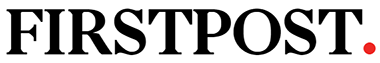
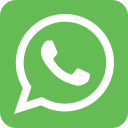

In [108]:
unique_urls